In [2]:
# we would first install opencv torch torchvision and ultralytics
!pip install opencv-python numpy matplotlib torch torchvision ultralytics

Defaulting to user installation because normal site-packages is not writeable


In [3]:
#import all the necessary libraries like cv2 and YOLO
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from ultralytics import YOLO

In [4]:
# Activate or call yolo model
model = YOLO("yolov8n.pt")  

In [5]:
# Mapping COCO class IDs to vehicle labels
vehicle_classes = {2: "car", 3: "motorcycle", 7: "truck"}

# defining a function for image classification , detection and identification
def detect_vehicles(image_path, conf_threshold=0.5):
    results = model(image_path)[0]
    detections = []
    for box in results.boxes:
        cls_id = int(box.cls.item())
        conf = box.conf.item()
        if conf > conf_threshold and cls_id in vehicle_classes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = vehicle_classes[cls_id]
            detections.append((x1, y1, x2, y2, label, conf))
    return detections

# Function for drawing boxes around while detection
def draw_boxes(image_path, detections):
    image = cv2.imread(image_path)
    for (x1, y1, x2, y2, label, conf) in detections:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{label} {conf:.2f}"
        cv2.putText(image, text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    return image


In [6]:
from ultralytics import YOLO

# Load the pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")  # or yolov8s.pt for better accuracy

# Define vehicle class IDs from COCO dataset
vehicle_classes = {2: "car", 3: "motorcycle", 7: "truck", 5: "bus"}

# Function to detect vehicles
def detect_vehicles(image_path, conf_threshold=0.5):
    results = model(image_path)[0]
    detections = []
    for box in results.boxes:
        cls_id = int(box.cls.item())
        conf = box.conf.item()
        if conf > conf_threshold and cls_id in vehicle_classes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = vehicle_classes[cls_id]
            detections.append((x1, y1, x2, y2, label, conf))
    return detections

# Function to draw bounding boxes
def draw_boxes(image_path, detections):
    image = cv2.imread(image_path)
    for (x1, y1, x2, y2, label, conf) in detections:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        text = f"{label} {conf:.2f}"
        cv2.putText(image, text, (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    return image



image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\1.jpg: 544x640 5 persons, 16 cars, 4 motorcycles, 1 bus, 2 trucks, 173.0ms
Speed: 9.2ms preprocess, 173.0ms inference, 4.7ms postprocess per image at shape (1, 3, 544, 640)


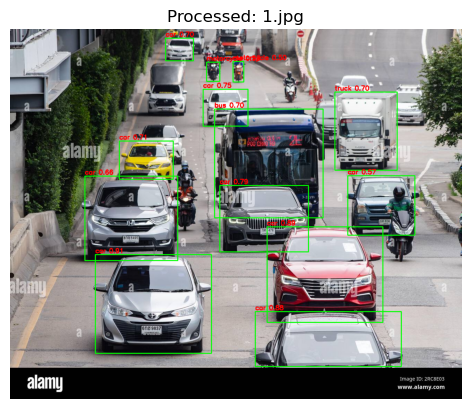


image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\10.png: 480x640 1 person, 1 bus, 1 stop sign, 1 potted plant, 154.2ms
Speed: 4.8ms preprocess, 154.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


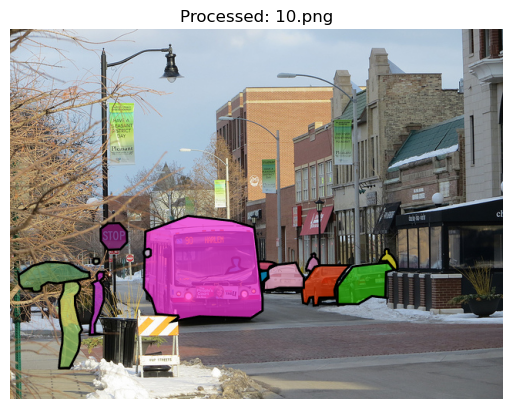


image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\11.jpg: 416x640 3 persons, 4 cars, 3 motorcycles, 142.1ms
Speed: 3.5ms preprocess, 142.1ms inference, 2.2ms postprocess per image at shape (1, 3, 416, 640)


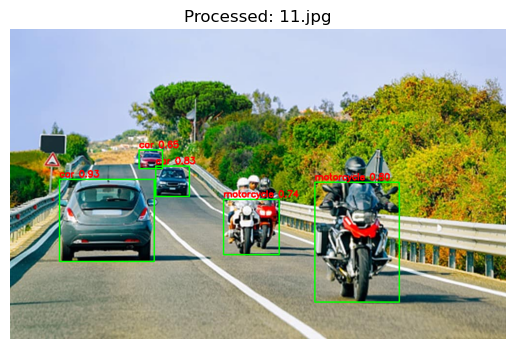


image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\2.png: 448x640 1 car, 1 bus, 2 trucks, 3 traffic lights, 114.8ms
Speed: 2.0ms preprocess, 114.8ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


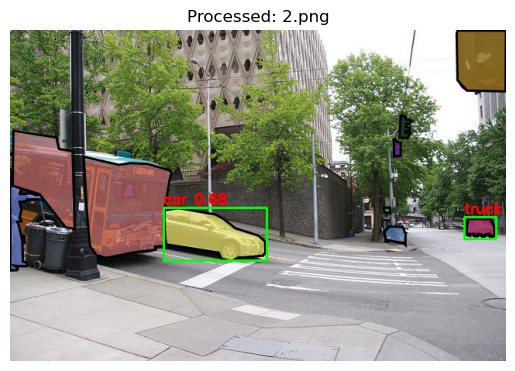


image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\3.png: 480x640 1 bus, 1 traffic light, 138.6ms
Speed: 3.7ms preprocess, 138.6ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


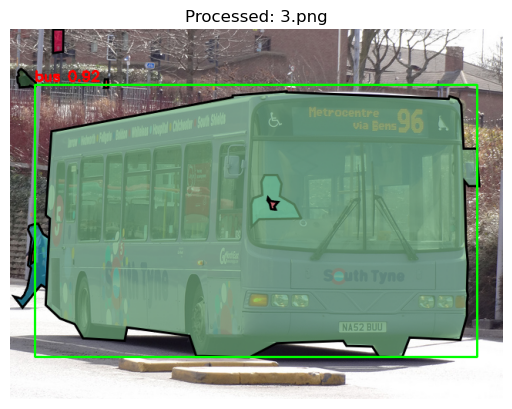


image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\4.png: 480x640 1 bus, 118.2ms
Speed: 2.0ms preprocess, 118.2ms inference, 4.5ms postprocess per image at shape (1, 3, 480, 640)



image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\6.png: 480x640 3 cars, 109.2ms
Speed: 2.0ms preprocess, 109.2ms inference, 2.2ms postprocess per image at shape (1, 3, 480, 640)


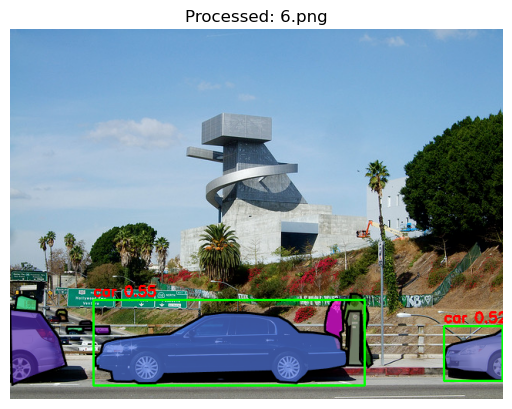


image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\7.png: 480x640 4 cars, 107.9ms
Speed: 2.0ms preprocess, 107.9ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)



image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\8.png: 480x640 1 person, 1 motorcycle, 86.3ms
Speed: 1.9ms preprocess, 86.3ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)



image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\9.png: 480x640 1 truck, 94.2ms
Speed: 8.3ms preprocess, 94.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)


In [7]:
import os
from collections import Counter

# Retrieving all the test images from its location for detecting vehicles in it and giving a folder path for storing annotated images
input_dir = r"C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images"
output_dir = r"C:\Users\HP\Downloads\TrafficVehicleDetection\output\processed_images"
os.makedirs(output_dir, exist_ok=True)

# For counting vehicles in the images
summary_counts = Counter()

for file in os.listdir(input_dir):
    if file.endswith((".jpg", ".png")):
        img_path = os.path.join(input_dir, file)
        detections = detect_vehicles(img_path)
        
        for _, _, _, _, label, _ in detections:
            summary_counts[label] += 1
        
        # Draw and save output
        result_img = draw_boxes(img_path, detections)
        output_path = os.path.join(output_dir, file)
        cv2.imwrite(output_path, result_img)

        # Show one sample image inline
        img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis("off")
        plt.title(f"Processed: {file}")
        plt.show()


In [8]:
import csv

# Ensure output directory exists
os.makedirs("output", exist_ok=True)

# Define path to CSV summary file
csv_path = r"C:\Users\HP\Downloads\TrafficVehicleDetection\output\vehicle_summary.csv"

# Open and write header
with open(csv_path, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Image", "Car", "Motorcycle", "Truck", "Bus"])  # header

    # Loop through images
    for file_name in os.listdir(input_dir):
        if file_name.endswith((".jpg", ".png")):
            img_path = os.path.join(input_dir, file_name)
            detections = detect_vehicles(img_path)

            # Count vehicles
            count = {"car": 0, "motorcycle": 0, "truck": 0, "bus":0}
            for _, _, _, _, label, _ in detections:
                count[label] += 1

            # Write row to CSV
            writer.writerow([file_name, count["car"], count["motorcycle"], count["truck"]])

print("✅ CSV summary saved to:", csv_path)




image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\1.jpg: 544x640 5 persons, 16 cars, 4 motorcycles, 1 bus, 2 trucks, 95.3ms
Speed: 7.3ms preprocess, 95.3ms inference, 1.5ms postprocess per image at shape (1, 3, 544, 640)

image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\10.png: 480x640 1 person, 1 bus, 1 stop sign, 1 potted plant, 103.1ms
Speed: 2.0ms preprocess, 103.1ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\11.jpg: 416x640 3 persons, 4 cars, 3 motorcycles, 74.0ms
Speed: 2.1ms preprocess, 74.0ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_images\2.png: 448x640 1 car, 1 bus, 2 trucks, 3 traffic lights, 79.2ms
Speed: 1.5ms preprocess, 79.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 C:\Users\HP\Downloads\TrafficVehicleDet

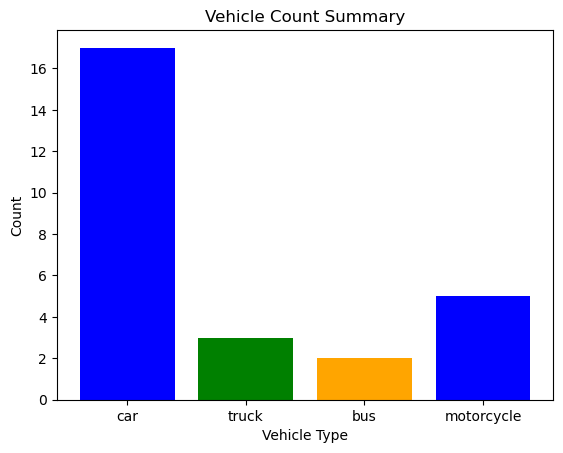

In [9]:
import matplotlib.pyplot as plt

labels = list(summary_counts.keys())
values = list(summary_counts.values())

plt.bar(labels, values, color=['blue', 'green', 'orange'])
plt.title("Vehicle Count Summary")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.show()



In [10]:
import cv2

# This is for the detection in video (it is not very prompt and it does detection in very detail frame by frame)
video_path = r"C:\Users\HP\Downloads\TrafficVehicleDetection\data\test_video\sample-5s.mp4"  # Change to your video path
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 inference on the frame
    results = model(frame)[0]

    # Loop through detections
    for box in results.boxes:
        cls_id = int(box.cls.item())
        conf = box.conf.item()
        if conf > 0.5 and cls_id in vehicle_classes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            label = vehicle_classes[cls_id]
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, f"{label} {conf:.2f}", (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    cv2.imshow("Traffic Detection (Video)", frame)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()



0: 384x640 3 cars, 1 truck, 76.8ms
Speed: 2.3ms preprocess, 76.8ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 86.5ms
Speed: 4.0ms preprocess, 86.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 72.1ms
Speed: 2.3ms preprocess, 72.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 73.2ms
Speed: 3.2ms preprocess, 73.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 cars, 1 truck, 70.4ms
Speed: 2.5ms preprocess, 70.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 4 cars, 1 truck, 70.4ms
Speed: 3.4ms preprocess, 70.4ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 76.1ms
Speed: 2.5ms preprocess, 76.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 cars, 1 truck, 91.6ms
Speed: 2.9ms preprocess, 91.6ms i